<a href="https://colab.research.google.com/github/NasaSpaceProgram/CS_167_Practive/blob/main/Project_2_NLP_peterson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:
The problem we are trying to solve is decifering if a review is positive or negative and which machine learning algorithum will best perform this task. The data we are given consists of IMDB reviews and an associated centement (either positive or negative). A machine learning modle that could accuratly predict this could be used by online retalers to give more accurate assecments of projects based on these review and allow coperations and users to shift through the reviews more easily at least in regars to differentiation positive and negative reviews. 


# Input Pipeline (sklearn):

In [4]:
from google.colab import drive
from numpy import mean
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

In [5]:
## Use cells here to explore the data:
s = data["review"].str.split().apply(len)
print("The number of samples is " + str(data.shape[0]))
print("The number of Catagories is " + str(data["sentiment"].unique()))
print("The number of Positive Reviews is " + str(data[data["sentiment"]=='positive'].shape[0]))
print("The number of negative Reviews is " + str(data[data["sentiment"]=='negative'].shape[0]))
print("The median number of words per sample is " + str(s.median()))
print("The average number of words per sample is " + str(s.mean()))
print("The Smallest number of words per sample is " + str(s.min()))
print("The Largest number of words per sample is " + str(s.max()))

The number of samples is 50000
The number of Catagories is ['positive' 'negative']
The number of Positive Reviews is 25000
The number of negative Reviews is 25000
The median number of words per sample is 173.0
The average number of words per sample is 231.15694
The Smallest number of words per sample is 4
The Largest number of words per sample is 2470


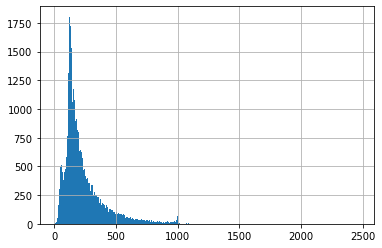

In [6]:
s.hist(bins = 500)

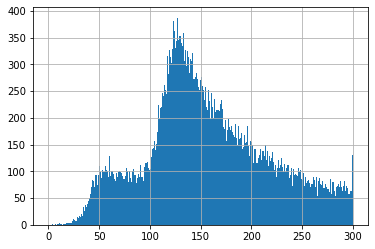

In [7]:
s.hist(range=(0,300) ,bins = 300)

## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 


First I downloaded a list of stop words from nltk then we go through each review and clean out the data. \\
This includes taking out all of the non letter charicters, then we make all of the charicters lowecase so that we can comepare them, and Finally we use the list of stopwords that we downloaded to take out all of the stop words.  

Once the review side of the data is clean I can take care of the sentement side. This must be converted to numerical data so I will go through and change ever positive to a one and every negative to a 0. 

Then I can vectorize the data. To do this we will create a grabbage of several hundred of the most common words and turn our revies into lists of how many times each of these words occures int the review. This will cause us to loose the infomation about the sequence of the words but it will make our data much easier to work with. 

Finally I used a PCA to lower the dimentionality of the data to make the modles take a bit less time to train. 

In [8]:
from bs4 import BeautifulSoup
import re
#natural langue too kit
import nltk
#only do next line once


# DOWNLOAD STOP WORDS LIST SO WE CAN TAKE THEM OUT
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit
#    stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [9]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords

    # TAKE OUT ANYTHING THAT ISNT A LETTER
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    # MAKE EVERYTHING LOWER CASE
    lower_case = letters_only.lower()
    # SPLIT THE STRINGS INTO AN ARRAY OF WORDS
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
      # TAKE OUT THE STOP WORDS
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [10]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [11]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [12]:
#enumerate the sentements so that they are easier to work with. 
def enumer(s):
  if s == "positive":
    return 1
  else:
    return 0 

Enumerated_Sentiments = data['sentiment'].apply(enumer)

In [13]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, Enumerated_Sentiments, test_size = 0.2, random_state=0) 

Change positive and negative to 0 and 1
USE pcs


### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [14]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()


#Make a vocabulary: all the unique words 
#Make each review an array witht he length of the language
#Have the counts of each word in the review as the 

# note the smaller we make the vocabulary the more sentement we loose 

###PCA

In [15]:
from sklearn.decomposition import PCA
extractor = PCA(n_components=10, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data_vectors)

train_transformed = extractor.transform(train_data_vectors)

#Now we transform the predictor columns in the test set as well.
#Notice that we're using the extractor that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = extractor.transform(test_data_vectors)

#Models and Tuning
##Metrics
For metrics I used accuracy because we are working with classification data. 
##Models
In this project I used  Support Vector Classifers, Perceptrons, and multi layered perceptrons. For the SVCs I was going to tune the kernal and the gamma values however collaberate kept closing my session for taking too long so I switched to just gamma. For the perceptrons I tuned the epoch and the learning rate. Finnaly for MLPs I tuned the epoch and the number of hidden layers. 

##SVCs

In [20]:
from sklearn.svm import SVC
clf = SVC(kernel= "poly", gamma = 0.1)                           
clf.fit(train_transformed ,train_sln)
predictions = clf.predict(test_transformed)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

accuracy: 0.677


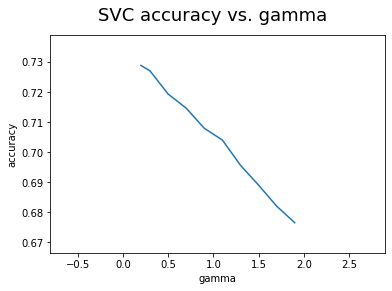

In [30]:
from sklearn.svm import SVC
gammas = [0.2,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9]

def SVC_Tune(gammas):
  accuracys = []
  for g in gammas:
      clf = SVC(gamma= g)
      clf.fit(train_transformed,train_sln)
      curr_predictions = clf.predict(test_transformed)
      curr_acc= metrics.accuracy_score(test_sln,curr_predictions)
      accuracys.append(curr_acc)
  return(accuracys)


def SVC_Tune_graph(accuracys,gammas):
    plt.suptitle('SVC accuracy vs. gamma',fontsize=18)
    plt.xlabel('gamma')
    plt.ylabel('accuracy')
    plt.plot(gammas,accuracys)
    plt.axis([gammas[0]-1,gammas[-1]+1,min(accuracys)-.01,max(accuracys)+.01])
    plt.show()
accuracys = SVC_Tune(gammas)
SVC_Tune_graph(accuracys,gammas)

##Perceptron

In [ ]:
from sklearn.linear_model import Perceptron


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_transformed,train_sln)
iris_perc_predictions = perc.predict(test_transformed)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

accuracy: 0.6373


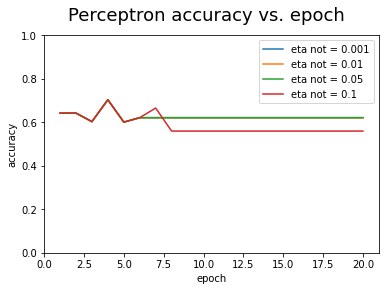

In [44]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Perceptron
max_iters = range(1,21)
eta0s = [0.001,0.01,0.05,0.1]

def Perceptron_Tune(eta0s,max_iters):
    series = {}
    for k in eta0s:
      accuracys = []
      for g in max_iters:
        clf = Perceptron(eta0= k, max_iter= g)
        clf.fit(train_transformed,train_sln)
        curr_predictions = clf.predict(test_transformed)
        curr_acc= metrics.accuracy_score(test_sln,curr_predictions)
        accuracys.append(curr_acc)
      series[k] = accuracys

    plt.suptitle('Perceptron accuracy vs. epoch',fontsize=18)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    for k in series.keys():
      plt.plot(max_iters, series[k] ,label=("eta not = " +str(k)))
    plt.axis([max_iters[0]-1,max_iters[-1]+1,0,1])
    plt.legend()
    plt.show()

Perceptron_Tune(eta0s,max_iters)

##Multi-layered Perceptron

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_transformed,train_sln)
predictions = mlp.predict(test_transformed)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))


Accuracy:  0.7321


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

hls = [(50,),(100,),(200,),(300,)]
max_iters = range(1,1001,100)
def MLP_Tune(hls,max_iters):
    series = {}
    for k in hls:
      accuracys = []
      for g in max_iters:
        clf = MLPClassifier(hidden_layer_sizes= k, max_iter= g)
        clf.fit(train_transformed,train_sln)
        curr_predictions = clf.predict(test_transformed)
        curr_acc= metrics.accuracy_score(test_sln,curr_predictions)
        accuracys.append(curr_acc)
      series[k] = accuracys
    return(series)

series = MLP_Tune(hls,max_iters)

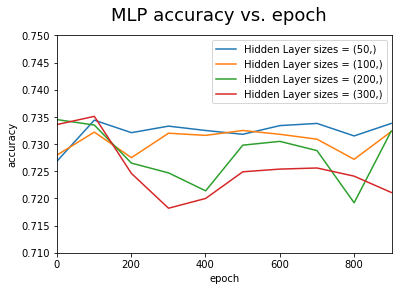

In [ ]:
def MLP_Tunes_plot(series,hls,max_iters):
    plt.suptitle('MLP accuracy vs. epoch',fontsize=18)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    for k in series.keys():
      plt.plot(max_iters, series[k],label=("Hidden Layer sizes = " +str(k)))
    plt.axis([max_iters[0]-1,max_iters[-1]+1,0.71,0.75])
    plt.legend()
    plt.show()
MLP_Tunes_plot(series,hls,max_iters)

# Conclusions

##Bumps in the Road

##Results

##Conclusion/ Discussion

## Resourses
For this project I used the following posted code as reference:

Day 14 Code SVC https://github.com/merriekay/CS167Code/blob/main/Day_14_Notes_SVM.ipynb

Day 14 Code pt2 PCA https://github.com/merriekay/CS167Code/blob/main/Day14Notes_PCA.ipynb


Day 17 Code Peceptron https://github.com/merriekay/CS167Code/blob/main/Day17_Notes_perceptron_f21.ipynb

Day 19 Code Multilayer Perceptron https://github.com/merriekay/CS167Code/blob/main/Day19_Notes_ANNs_f21.ipynb

Day 23 code NLP https://github.com/merriekay/CS167Code/blob/main/Day23Notes_RNNs4NLP.ipynb





For this project I used the following Websights for help:

https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

https://www.w3schools.com/python/ref_string_split.asp

https://www.guru99.com/find-average-list-python.html


https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

https://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


